In [2]:
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [3]:
def show_fig():
    dataSet = loadDataSet()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataSet[:, 0], dataSet[:, 1])
    plt.show()

In [4]:
# 计算两个向量之间的欧式距离
def calcuDistance(vec1, vec2):
    return np.sqrt(np.sum(np.square(vec1 - vec2)))

In [5]:
def loadDataSet():
    dataSet = np.loadtxt("dataSet.csv")
    return dataSet

In [6]:
def initCentroids(dataSet, k):
    dataSet = list(dataSet)
    #sample函数从dataSet中随机选择k个不重复的元素
    return random.sample(dataSet, k)   

In [7]:
def minDistance(dataSet, centroidList):
    clusterDict = dict()
    k = len(centroidList)
    for item in dataSet:
        flag = -1
        minDis = float("inf")  # 初始化为最大值
        # 这个for循环结束时，flag就是item的类别
        for i in range(k):
            distance = calcuDistance(item, centroidList[i])
            if distance < minDis:
                minDis = distance
                flag = i
        # 如果是第一次迭代，则可能这个类别里都是空的
        if flag not in clusterDict.keys():
            clusterDict[flag] = []
        clusterDict[flag].append(item)
    return clusterDict
        

In [8]:
def getCentroids(clusterDict):
    # 重新计算k个质心
    centroidList = []
    for key in clusterDict.keys():
        centroid = np.mean(clusterDict[key], axis = 0)
        centroidList.append(centroid)
    return centroidList

In [9]:
# 计算各个族与其质心的均方误差
def getVar(centroidList, clusterDict):
    sum = 0.0
    for key in clusterDict.keys():
        distance = 0.0
        for item in clusterDict[key]:
            distance += calcuDistance(centroidList[key], item)
        sum += distance
    return sum

In [10]:
def showCluster(centroidList, clusterDict):
    colorMark = ['or', 'ob', 'og', 'ok', 'oy', 'ow'] # o表示圆形，另一个字母表示颜色
    centroidMark = ['xr', 'xb', 'xg', 'xk', 'xy', 'xw']
    
    for key in clusterDict.keys():
        plt.plot(centroidList[key][0], centroidList[key][1], centroidMark[key], markersize=12) #质心点
        for item in clusterDict[key]:
            plt.plot(item[0], item[1], colorMark[key])
    plt.show()

In [11]:
def k_means():
    dataSet = loadDataSet()
    centroidList = initCentroids(dataSet, 4)
    clusterDict = minDistance(dataSet, centroidList)
    
    newVar = getVar(centroidList, clusterDict)
    oldVar = 1 
    
    # 当距离小于一定值的时候停止迭代
    while abs(newVar - oldVar) >= 0.00001:
        centroidList = getCentroids(clusterDict)
        clusterDict = minDistance(dataSet, centroidList)
        oldVar = newVar
        newVar = getVar(centroidList, clusterDict)
        #times += 1
        showCluster(centroidList, clusterDict)
    

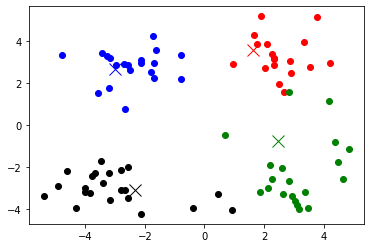

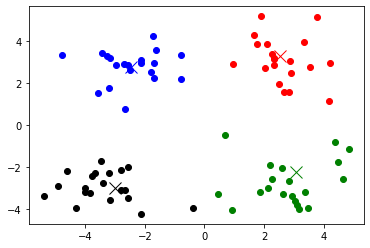

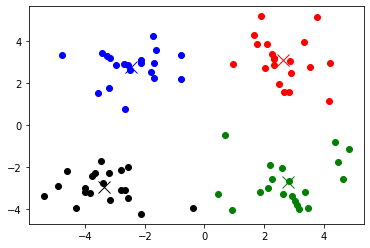

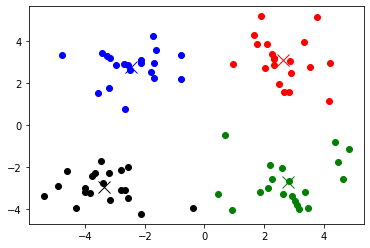

In [12]:
if __name__ == '__main__':
    k_means()